In [ ]:
#importing libraries 
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
from textblob import TextBlob


In [ ]:
#loading the dataset 
df=pd.read_csv('amazon_cellphone_reviews.csv')

In [ ]:
df

In [5]:
#selecting the columns required
df=df[['rating', 'review']]

In [6]:
#checking for null values 
df.isnull().sum()

rating     0
review    21
dtype: int64

In [7]:
df.dropna(inplace=True)

C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_10624\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [8]:
df

,rating,review
0,3,I had the Samsung A600 for awhile which is abs...
1,1,Due to a software issue between Nokia and Spri...
2,5,"This is a great, reliable phone. I also purcha..."
3,3,"I love the phone and all, because I really did..."
4,4,The phone has been great for every purpose it ...
...,...,...
67981,5,I love the camera on this phone. The screen is...
67982,5,I've been an Xperia user for several years and...
67983,5,buy one more for my cousin
67984,5,Product looks and works like new. Very much re...


plotting the length of the reviews 

C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_10624\684371451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_length'] = df['review'].apply(len)


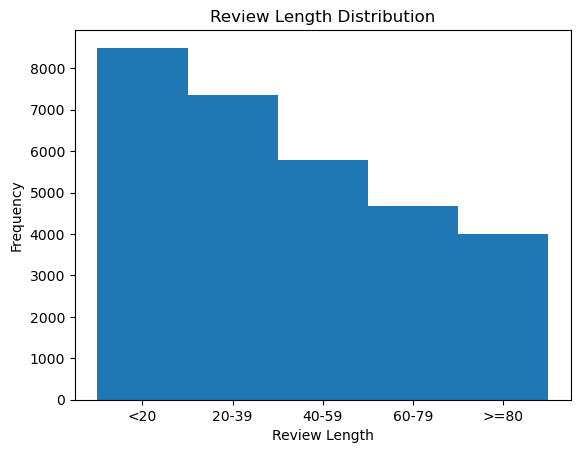

In [9]:
df['review_length'] = df['review'].apply(len)
# Divide the review lengths into five groups
bins = [0, 20, 40, 60, 80, 100]
plt.hist(df['review_length'], bins=bins)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Review Length Distribution')

# Set custom labels for the x-axis ticks
labels = ['<20', '20-39', '40-59', '60-79', '>=80']  # Customize these labels as per your desired groups

plt.xticks([(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)], labels)

plt.show()


In [10]:
#converting all alphabets into lower case 
df['review'] =df['review'].str.lower()

C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_10624\3606340018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] =df['review'].str.lower()


In [11]:
#removing special charechters ,numbers and punctuation

df['review'] = df['review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_10624\1511115623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))


In [12]:
#removing words having wordcount less than 3

# Function to remove words with word count less than 3
def remove_words_less_than_3(text):
    filtered_text = ' '.join([word for word in text.split() if len(word) > 3])
    return filtered_text

# Remove words with count less than 3 from 'review' column
df['review'] = df['review'].apply(remove_words_less_than_3)


C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_10624\781378848.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(remove_words_less_than_3)


In [13]:
#removing stopwords

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a given text
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Remove stopwords from 'review' column
df['review'] = df['review'].apply(remove_stopwords)

C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_10624\1025358753.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(remove_stopwords)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Amal_VT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


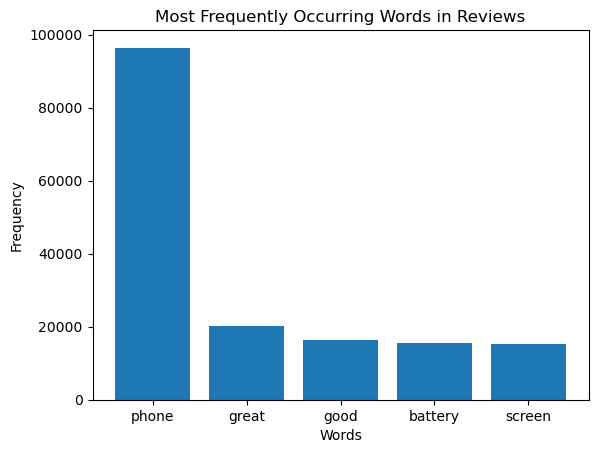

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import nltk
nltk.download('punkt')

combined_text = ' '.join(df['review'])
words = word_tokenize(combined_text)
word_frequencies = Counter(words)

num_top_words = 5
top_words = word_frequencies.most_common(num_top_words)

word_labels = [word[0] for word in top_words]
word_counts = [word[1] for word in top_words]

plt.bar(word_labels, word_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequently Occurring Words in Reviews')
plt.show()


In [15]:
#Tokenising review column

# Function to tokenize the 'review' column
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Tokenize the 'review' column
df['review'] = df['review'].apply(tokenize_text)

C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_10624\3319398726.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(tokenize_text)


In [16]:
df[['rating', 'review']]

,rating,review
0,3,"[samsung, awhile, absolute, read, review, dete..."
1,1,"[software, issue, nokia, sprint, phones, text,..."
2,5,"[great, reliable, phone, also, purchased, phon..."
3,3,"[love, phone, really, need, didnt, expect, pri..."
4,4,"[phone, great, every, purpose, offers, except,..."
...,...,...
67981,5,"[love, camera, phone, screen, huge, colors, vi..."
67982,5,"[xperia, user, several, years, sony, come, lon..."
67983,5,[cousin]
67984,5,"[product, looks, works, like, much, recommend]"


In [17]:
df[['rating', 'review']]

,rating,review
0,3,"[samsung, awhile, absolute, read, review, dete..."
1,1,"[software, issue, nokia, sprint, phones, text,..."
2,5,"[great, reliable, phone, also, purchased, phon..."
3,3,"[love, phone, really, need, didnt, expect, pri..."
4,4,"[phone, great, every, purpose, offers, except,..."
...,...,...
67981,5,"[love, camera, phone, screen, huge, colors, vi..."
67982,5,"[xperia, user, several, years, sony, come, lon..."
67983,5,[cousin]
67984,5,"[product, looks, works, like, much, recommend]"


performing lemmatization on review column

In [18]:

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization to a list of tokens
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply lemmatization to the 'review' column
df['review'] = df['review'].apply(lemmatize_tokens)



C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_10624\1913990952.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lemmatize_tokens)


In [19]:
df[['rating', 'review']]

,rating,review
0,3,"[samsung, awhile, absolute, read, review, dete..."
1,1,"[software, issue, nokia, sprint, phone, text, ..."
2,5,"[great, reliable, phone, also, purchased, phon..."
3,3,"[love, phone, really, need, didnt, expect, pri..."
4,4,"[phone, great, every, purpose, offer, except, ..."
...,...,...
67981,5,"[love, camera, phone, screen, huge, color, vib..."
67982,5,"[xperia, user, several, year, sony, come, long..."
67983,5,[cousin]
67984,5,"[product, look, work, like, much, recommend]"


 Creating a word cloud to visualise the frequent words.


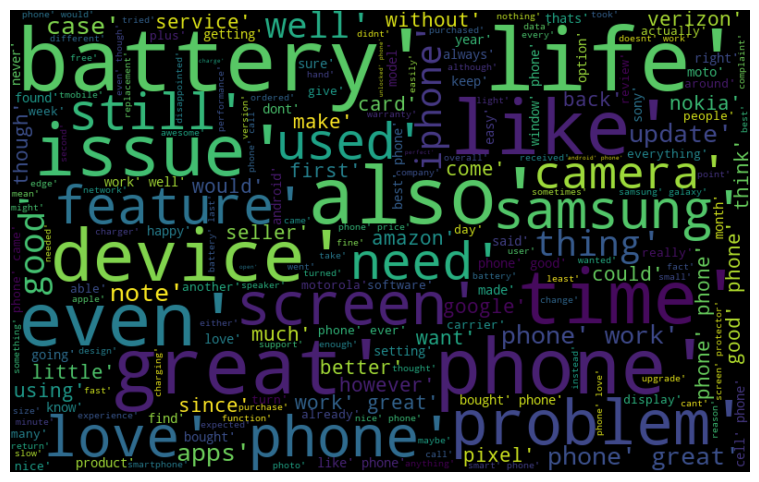

In [20]:
from wordcloud import WordCloud

all_words = " ".join(str(sentence) for sentence in df.apply(lambda row: row['review'], axis=1))

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

labeling and scoring review column

In [21]:
def get_sentiment(review):
    sentiment_labels = []
    sentiment_scores = []
    for text in review:
        blob = TextBlob(str(text))
        sentiment_score = blob.sentiment.polarity
        if sentiment_score > 0:
            sentiment_label = 'Positive'
        elif sentiment_score < 0:
            sentiment_label = 'Negative'
        else:
            sentiment_label = 'Neutral'
        sentiment_labels.append(sentiment_label)
        sentiment_scores.append(sentiment_score)
    return sentiment_labels, sentiment_scores

sentiment_results = get_sentiment(df['review'])
df[['sentiment_label', 'sentiment_score']] = pd.DataFrame(sentiment_results).T



C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_10624\3104358031.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['sentiment_label', 'sentiment_score']] = pd.DataFrame(sentiment_results).T
C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_10624\3104358031.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['sentiment_label', 'sentiment_score']] = pd.DataFrame(sentiment_results).T


In [22]:
df.dropna(inplace=True)

C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_10624\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [23]:
df

,rating,review,review_length,sentiment_label,sentiment_score
0,3,"[samsung, awhile, absolute, read, review, dete...",1688,Positive,0.143754
1,1,"[software, issue, nokia, sprint, phone, text, ...",748,Positive,0.156667
2,5,"[great, reliable, phone, also, purchased, phon...",768,Positive,0.298718
3,3,"[love, phone, really, need, didnt, expect, pri...",524,Positive,0.31875
4,4,"[phone, great, every, purpose, offer, except, ...",606,Positive,0.01875
...,...,...,...,...,...
67960,3,"[final, update, ended, ordering, another, sams...",3622,Positive,0.223214
67961,4,"[phone, looked, nice, larger, current, phone, ...",2928,Positive,0.05
67962,4,"[start, review, saying, sony, xperia, compatib...",938,Neutral,0.0
67963,3,"[really, wanted, like, phone, buggy, glitchy, ...",574,Positive,0.2


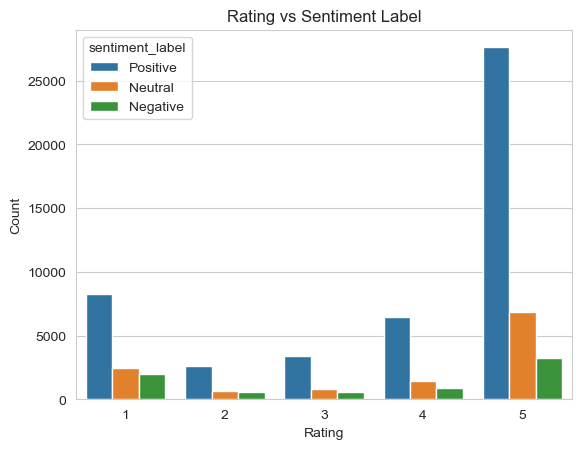

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the plotting style
sns.set_style("whitegrid")

# Plot the count of sentiment labels for each rating
sns.countplot(data=df, x='rating', hue='sentiment_label')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating vs Sentiment Label')

# Show the plot
plt.show()


Naive bayes

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder



# Convert sentiment labels to numerical values
label_encoder = LabelEncoder()
df['sentiment_label'] = label_encoder.fit_transform(df['sentiment_label'])

# Convert lists of words to strings
df['review'] = df['review'].apply(lambda x: ' '.join(x))

# Split the data into features and target variable
X = df['review']
y = df['sentiment_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Initialize the Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_10624\2197278347.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_label'] = label_encoder.fit_transform(df['sentiment_label'])
C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_10624\2197278347.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x: ' '.join(x))


Accuracy: 0.691220840385606
